In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [9]:
xls = pd.ExcelFile('../cust_journey/fin_dist.xlsx')

### Reading sheet 1

In [11]:
sheet1 = xls.parse(0)
sheet1.head()

,Building,Month,Year,Category,Tenant,Cat_Sales,Lease_Sales,Cat_Groc,Lease_Groc,Cat_Sales_PSF,Lease_Sales_PSF,Cat_GLA,Lease_GLA
0,Yorkdale Shopping Centre,11,2017,Children & Infants Apparel,"Childrens Place, The",1504219.33,296994.16,31.99,53.12,84.9217,61.1854,17713,4854
1,Yorkdale Shopping Centre,11,2017,Children & Infants Apparel,Gap Kids,1504219.33,653492.57,31.99,27.67,84.9217,97.7550,17713,6685
2,Yorkdale Shopping Centre,11,2017,Children & Infants Apparel,Gymboree,1504219.33,186516.43,31.99,29.38,84.9217,115.9207,17713,1609
3,Yorkdale Shopping Centre,11,2017,Children & Infants Apparel,Kids Foot Locker,1504219.33,367216.17,31.99,26.15,84.9217,80.4416,17713,4565
4,Yorkdale Shopping Centre,11,2017,Electronics,Apple,16325073.58,11782680.00,7.82,2.76,478.7832,1169.0326,34097,10079


In [12]:
sheet1.describe()

,Month,Year,Cat_Sales,Lease_Sales,Cat_Groc,Lease_Groc,Cat_Sales_PSF,Lease_Sales_PSF,Cat_GLA,Lease_GLA
count,481.000000,481.0,4.810000e+02,4.810000e+02,481.000000,4.810000e+02,481.000000,481.000000,481.000000,481.000000
mean,11.505198,2017.0,1.735163e+07,8.548292e+05,18.777360,9.996678e+05,227.322963,230.796360,116473.879418,5788.224532
std,0.500494,0.0,1.979281e+07,2.301586e+06,7.202537,2.192383e+07,186.106869,368.962696,206579.272876,15737.456046
min,11.000000,2017.0,7.385033e+04,1.000000e-02,3.570000,0.000000e+00,60.981500,0.000000,1081.000000,0.000000
25%,11.000000,2017.0,2.381769e+06,1.700000e+05,10.150000,1.519000e+01,105.891200,82.472700,16443.000000,1153.000000
50%,12.000000,2017.0,9.586273e+06,3.107660e+05,19.050000,2.305000e+01,167.668500,137.104700,36619.000000,2250.000000
75%,12.000000,2017.0,2.396680e+07,7.301230e+05,25.700000,3.372000e+01,267.989200,257.717600,94231.000000,4349.000000
max,12.000000,2017.0,7.699292e+07,3.260187e+07,40.230000,4.808271e+08,1511.455700,5771.543000,801525.000000,189111.000000


### How much increase in sales PSF from Nov to Dec

In [13]:
cat_month = sheet1.groupby(['Month','Category'])[['Cat_Sales_PSF']].mean()
cat_month.sort_values(by=['Cat_Sales_PSF'], ascending=True, inplace=True)
cat_month.head()

Cat_Sales_PSF
Month Category                                     
11    Furniture & Home Furnishings          60.9815
12    Other Services                        61.0333
11    Other Services                        63.2720
      Specialty Leasing                     64.8270
      General merch & variety stores        69.7585

#### Adding .reset_index to the line with .mean() makes the column names appear but causes other problems

In [14]:
cat_month.columns

Index(['Cat_Sales_PSF'], dtype='object')

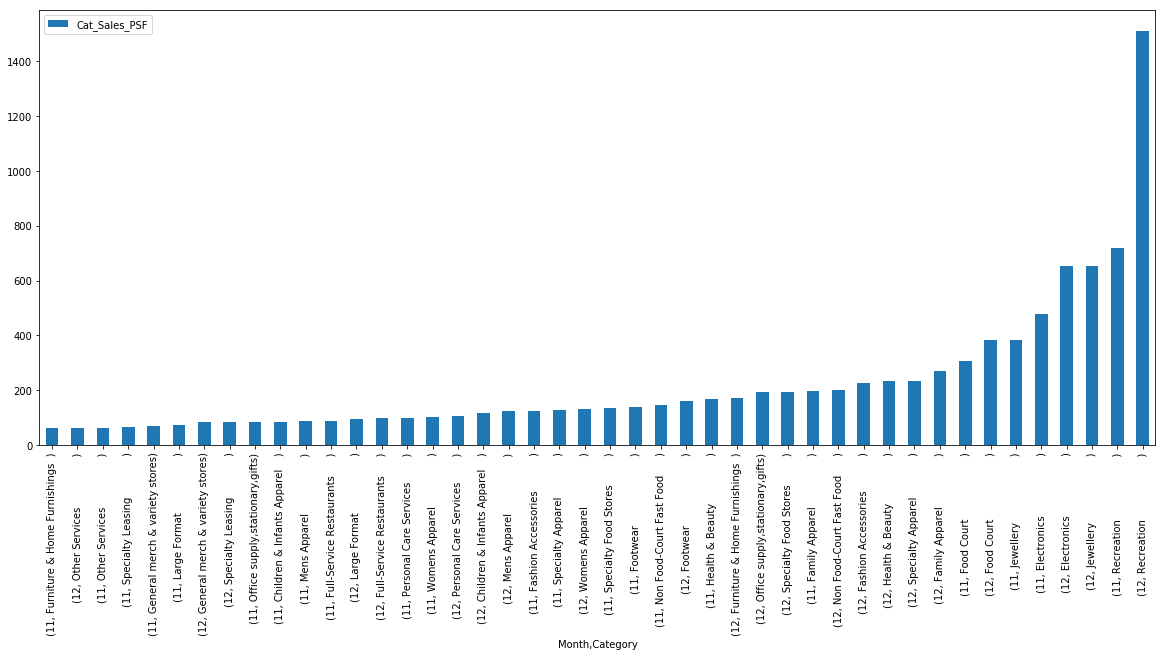

In [34]:
cat_month.plot(kind='bar',figsize=(20,8))
plt.xticks(rotation=90)
plt.savefig('../Monthly_incr_by_category', dpi=300, edgecolor='w',bbox_inches="tight")
plt.show()

In [25]:
subset=sheet1[['Month', 'Category','Lease_Sales_PSF','Tenant']]
subset.head()

,Month,Category,Lease_Sales_PSF,Tenant
0,11,Children & Infants Apparel,61.1854,"Childrens Place, The"
1,11,Children & Infants Apparel,97.7550,Gap Kids
2,11,Children & Infants Apparel,115.9207,Gymboree
3,11,Children & Infants Apparel,80.4416,Kids Foot Locker
4,11,Electronics,1169.0326,Apple


In [26]:
all_tenants = subset.groupby('Tenant')[['Lease_Sales_PSF']].mean()
all_cats = subset.groupby('Category')[['Lease_Sales_PSF']].mean()
month_avg = subset.groupby('Month')[['Lease_Sales_PSF']].mean()

In [27]:
all_cats.sort_values(by=['Lease_Sales_PSF'], ascending=False, inplace=True)

### plotting all tenants by their cat sales psf

In [28]:
all_tenants.nlargest(20,'Lease_Sales_PSF')
all_tenants.sort_values(by=['Lease_Sales_PSF'], ascending=False, inplace=True)

In [31]:
# fig = all_tenants.plot( kind='barh',figsize=(30,40), legend=True)
# plt.title('PSF by Tenant')
# fig.tick_params(axis='y', labelleft='off', labelright='on') # to move labels on right
plt.savefig('../PSF_by_Tenant', dpi=300, edgecolor='w',bbox_inches="tight")
# plt.xticks(rotation=90)
# plt.show()

### plot by category

In [41]:
all_cats.nlargest(30,'Lease_Sales_PSF')

,Lease_Sales_PSF
Category,
Recreation,1498.090617
Jewellery,473.254426
Food Court,364.454263
Electronics,316.581714
Family Apparel,259.839701
Health & Beauty,224.401812
Non Food-Court Fast Food,218.171469
Specialty Apparel,189.034780
Fashion Accessories,176.373589


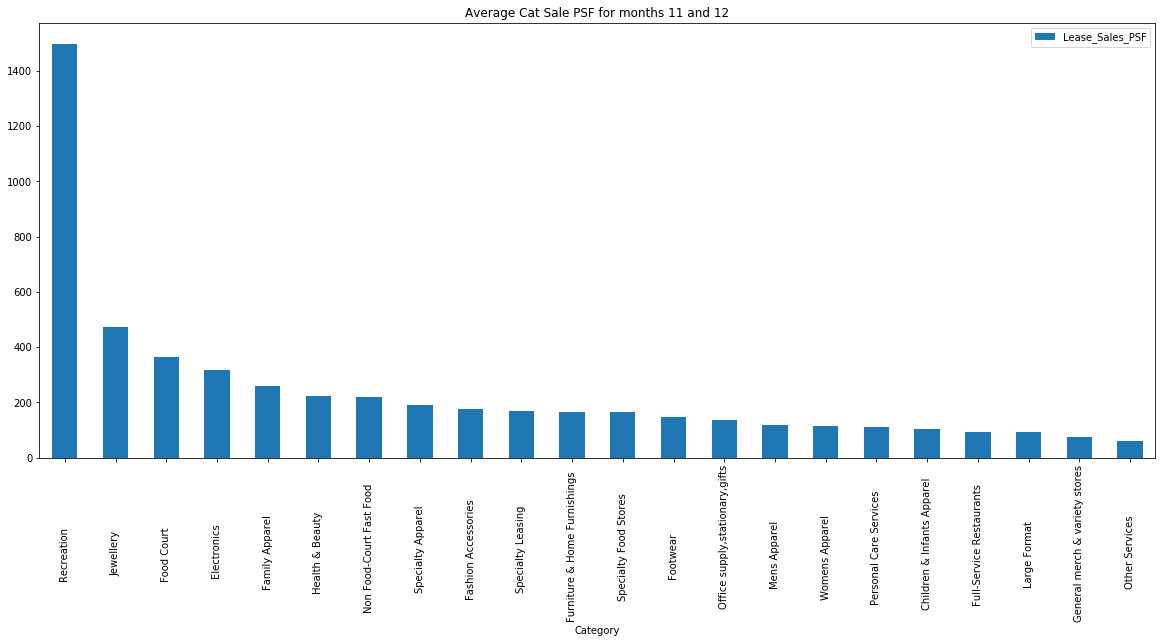

In [42]:
all_cats.plot(kind='bar',figsize=(20,8))
plt.xticks(rotation=90)
plt.title('Average Cat Sale PSF for months 11 and 12')
plt.savefig('../Avg_Cat_Sale_Nov-Dec_2017', dpi=300, edgecolor='w',bbox_inches="tight")
plt.show()

In [47]:
month_avg.nlargest(30,'Lease_Sales_PSF')

,Lease_Sales_PSF
Month,
12,273.131222
11,187.572111


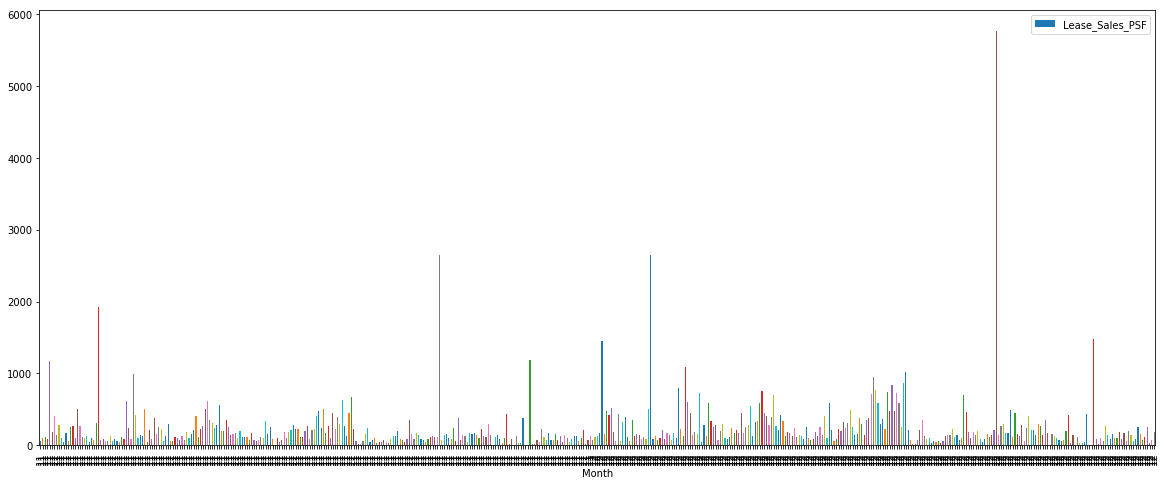

In [48]:
subset.plot(x='Month',y='Lease_Sales_PSF',kind='bar', figsize=(20,8))
plt.show()

In [50]:
sale_month=subset.pivot_table(index=['Tenant','Lease_Sales_PSF','Category'])
sale_month.head(10)

Month
Tenant                         Lease_Sales_PSF Category                             
A & W                          400.2785        Food Court                       11.0
                               540.3338        Food Court                       12.0
Aldo                           125.0519        Footwear                         12.0
                               133.8539        Footwear                         11.0
Aldo Accessories               106.7040        Fashion Accessories              12.0
                               110.3373        Fashion Accessories              11.0
Alex and Ani                   101.9506        Fashion Accessories              11.0
                               242.3470        Fashion Accessories              12.0
AllSaints                      117.7140        Family Apparel                   11.0
                               124.3665        Family Apparel                   12.0

In [51]:
sale_month.describe()

,Month
count,478.000000
mean,11.505230
std,0.498923
min,11.000000
25%,11.000000
50%,12.000000
75%,12.000000
max,12.000000


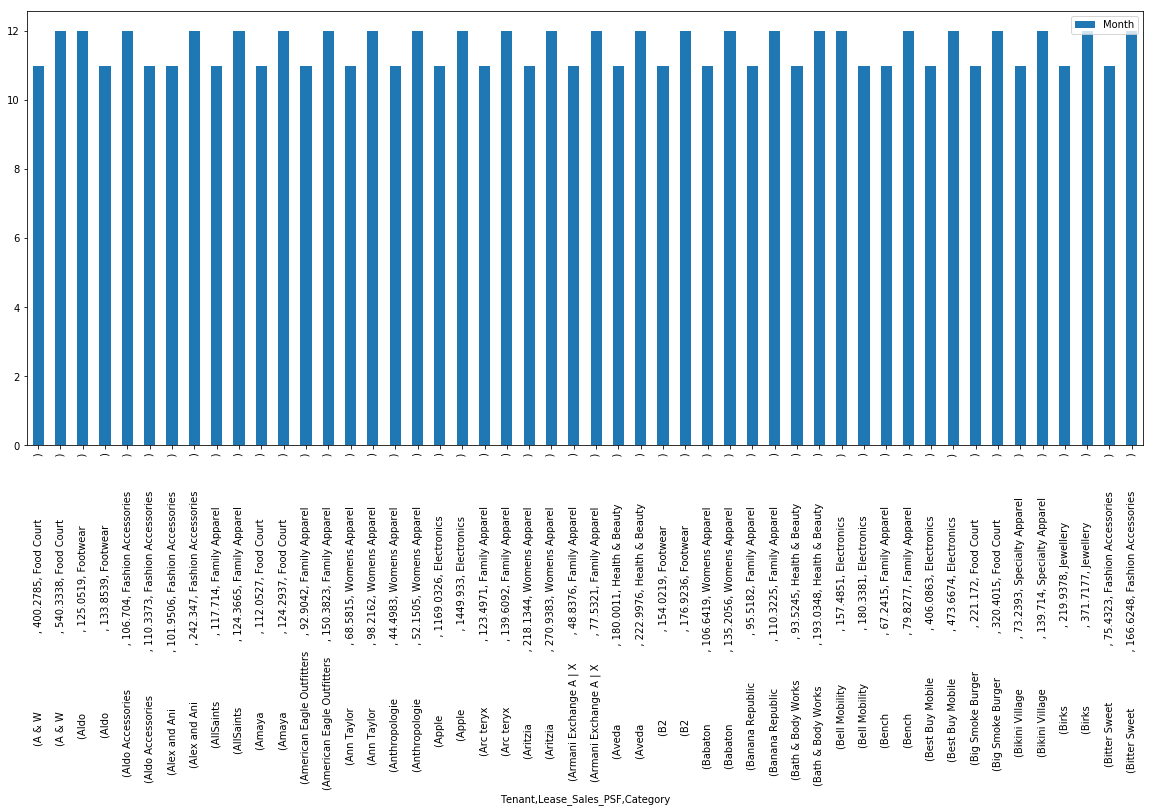

In [52]:
sale_month.head(50).plot(kind='bar', figsize=(20,8))
plt.show()

# Exploring how size of store affects the Lease_Sales_PSF

In [82]:
bins = [1,540,2000, 10000,200000] # it will be useful to categorize them meaningfully, not just pick numbers
labels = ['small', 'medium', 'large', 'huge']
store_sizes = pd.cut(sheet1.Lease_GLA, bins,labels=labels)
sheet1['store_type'] = store_sizes

In [83]:
sheet1.head()

,Building,Month,Year,Tenant,Cat_Sales,Lease_Sales,Cat_Groc,Lease_Groc,Cat_Sales_PSF,Lease_Sales_PSF,Cat_GLA,Lease_GLA,store_type
Category,,,,,,,,,,,,,
Children & Infants Apparel,Yorkdale Shopping Centre,11,2017,"Childrens Place, The",1504219.33,296994.16,31.99,53.12,84.9217,61.1854,17713,4854,large
Children & Infants Apparel,Yorkdale Shopping Centre,11,2017,Gap Kids,1504219.33,653492.57,31.99,27.67,84.9217,97.7550,17713,6685,large
Children & Infants Apparel,Yorkdale Shopping Centre,11,2017,Gymboree,1504219.33,186516.43,31.99,29.38,84.9217,115.9207,17713,1609,medium
Children & Infants Apparel,Yorkdale Shopping Centre,11,2017,Kids Foot Locker,1504219.33,367216.17,31.99,26.15,84.9217,80.4416,17713,4565,large
Electronics,Yorkdale Shopping Centre,11,2017,Apple,16325073.58,11782680.00,7.82,2.76,478.7832,1169.0326,34097,10079,huge


In [84]:
sales_by_store_size = sheet1.groupby('store_type')[['Lease_Sales_PSF']].mean()

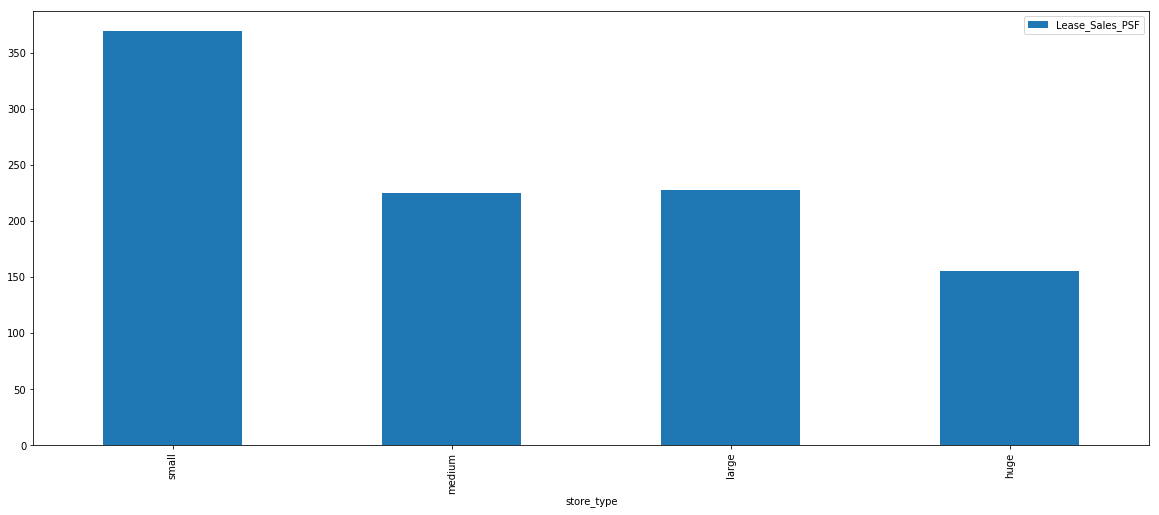

In [85]:
sales_by_store_size.plot(kind='bar',figsize=(20,8))
plt.show()

In [59]:
sheet1.set_index('Category', inplace=True)
sheet1.head()

,Building,Month,Year,Tenant,Cat_Sales,Lease_Sales,Cat_Groc,Lease_Groc,Cat_Sales_PSF,Lease_Sales_PSF,Cat_GLA,Lease_GLA,store_type
Category,,,,,,,,,,,,,
Children & Infants Apparel,Yorkdale Shopping Centre,11,2017,"Childrens Place, The",1504219.33,296994.16,31.99,53.12,84.9217,61.1854,17713,4854,large
Children & Infants Apparel,Yorkdale Shopping Centre,11,2017,Gap Kids,1504219.33,653492.57,31.99,27.67,84.9217,97.7550,17713,6685,large
Children & Infants Apparel,Yorkdale Shopping Centre,11,2017,Gymboree,1504219.33,186516.43,31.99,29.38,84.9217,115.9207,17713,1609,medium
Children & Infants Apparel,Yorkdale Shopping Centre,11,2017,Kids Foot Locker,1504219.33,367216.17,31.99,26.15,84.9217,80.4416,17713,4565,large
Electronics,Yorkdale Shopping Centre,11,2017,Apple,16325073.58,11782680.00,7.82,2.76,478.7832,1169.0326,34097,10079,large


In [60]:
sale_psf=sheet1['Lease_Sales_PSF']
# store=sheet1['Tenant']
# category=sheet1['Category']
sale_psf.head()
# store.head()

Category
Children & Infants Apparel          61.1854
Children & Infants Apparel          97.7550
Children & Infants Apparel         115.9207
Children & Infants Apparel          80.4416
Electronics                       1169.0326
Name: Lease_Sales_PSF, dtype: float64

In [62]:
sort_by_psf = sheet1.sort_values(['Lease_Sales_PSF'], ascending=False)
sort_by_psf.head(20)

,Building,Month,Year,Tenant,Cat_Sales,Lease_Sales,Cat_Groc,Lease_Groc,Cat_Sales_PSF,Lease_Sales_PSF,Cat_GLA,Lease_GLA,store_type
Category,,,,,,,,,,,,,
Recreation,Yorkdale Shopping Centre,12,2017,Tesla Motors,15744835.01,14400000.00,3.57,1.01,1511.4557,5771.5430,10417,2495,large
Family Apparel,Yorkdale Shopping Centre,12,2017,Canada Goose,44062518.24,11959834.00,19.05,7.07,267.9892,2648.3246,164419,4516,large
Recreation,Yorkdale Shopping Centre,11,2017,Tesla Motors,7482540.24,6600000.00,3.89,1.11,718.3008,2645.2905,10417,2495,large
Family Apparel,Yorkdale Shopping Centre,11,2017,Canada Goose,31582267.03,8671938.00,19.53,7.19,197.4595,1920.2697,159943,4516,large
Specialty Leasing,Yorkdale Shopping Centre,12,2017,Uncle Tetsu,2381768.95,233935.37,9.84,2.33,82.2661,1471.2916,28952,159,small
Electronics,Yorkdale Shopping Centre,12,2017,Apple,22267548.05,14613875.00,7.85,2.76,653.0647,1449.9330,34097,10079,large
Specialty Leasing,Yorkdale Shopping Centre,11,2017,Uncle Tetsu,1545930.35,188145.39,9.99,2.52,64.8270,1183.3043,23847,159,small
Electronics,Yorkdale Shopping Centre,11,2017,Apple,16325073.58,11782680.00,7.82,2.76,478.7832,1169.0326,34097,10079,large
Family Apparel,Yorkdale Shopping Centre,12,2017,Moncler,44062518.24,2751151.75,19.05,7.43,267.9892,1089.1337,164419,2526,large


In [70]:
sort_by_psf.drop_duplicates(inplace=True)
sort_by_psf.dropna() # to drop stores which are zero sq ft (stalls?)

,Building,Month,Year,Tenant,Cat_Sales,Lease_Sales,Cat_Groc,Lease_Groc,Cat_Sales_PSF,Lease_Sales_PSF,Cat_GLA,Lease_GLA,store_type
Category,,,,,,,,,,,,,
Recreation,Yorkdale Shopping Centre,12,2017,Tesla Motors,15744835.01,14400000.00,3.57,1.010000e+00,1511.4557,5771.5430,10417,2495,large
Family Apparel,Yorkdale Shopping Centre,12,2017,Canada Goose,44062518.24,11959834.00,19.05,7.070000e+00,267.9892,2648.3246,164419,4516,large
Recreation,Yorkdale Shopping Centre,11,2017,Tesla Motors,7482540.24,6600000.00,3.89,1.110000e+00,718.3008,2645.2905,10417,2495,large
Family Apparel,Yorkdale Shopping Centre,11,2017,Canada Goose,31582267.03,8671938.00,19.53,7.190000e+00,197.4595,1920.2697,159943,4516,large
Specialty Leasing,Yorkdale Shopping Centre,12,2017,Uncle Tetsu,2381768.95,233935.37,9.84,2.330000e+00,82.2661,1471.2916,28952,159,small
Electronics,Yorkdale Shopping Centre,12,2017,Apple,22267548.05,14613875.00,7.85,2.760000e+00,653.0647,1449.9330,34097,10079,large
Specialty Leasing,Yorkdale Shopping Centre,11,2017,Uncle Tetsu,1545930.35,188145.39,9.99,2.520000e+00,64.8270,1183.3043,23847,159,small
Electronics,Yorkdale Shopping Centre,11,2017,Apple,16325073.58,11782680.00,7.82,2.760000e+00,478.7832,1169.0326,34097,10079,large
Family Apparel,Yorkdale Shopping Centre,12,2017,Moncler,44062518.24,2751151.75,19.05,7.430000e+00,267.9892,1089.1337,164419,2526,large


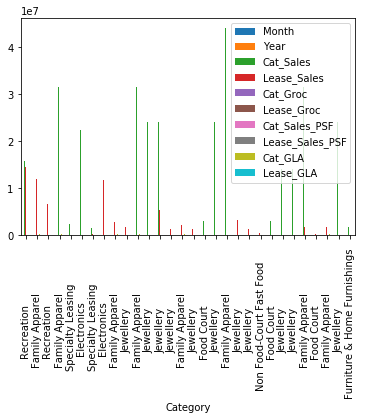

In [73]:
sort_by_psf.head(30).plot( kind='bar') # not sure why I did this!!!! meaningless as such
plt.show()

In [203]:
name_loc = xls.parse(2)
name_loc.drop_duplicates(inplace=True)

In [204]:
print("Column headings:", name_loc.columns)

Column headings: Index(['Tenant', 'Unit # '], dtype='object')


In [206]:
name_loc

,Tenant,Unit #
0,Stockhomme,0011
19,A & W,0742K
24,Aldo,0081
42,Aldo,0058
84,Aldo Accessories,0093A
144,Arbys,0732K
148,Aritzia,0071
204,Aritzia,0028A
208,Aveda,0022A
229,Aveda,0097


In [207]:
name_loc.set_index('Unit # ', inplace=True)

In [208]:
name_loc.head()

,Tenant
Unit #,
0011,Stockhomme
0742K,A & W
0081,Aldo
0058,Aldo
0093A,Aldo Accessories


In [209]:
name_loc.drop(['Unit #'])
print("Column headings:", name_loc.columns)

Column headings: Index(['Tenant'], dtype='object')


In [210]:
name_loc.rename(columns={'Unit # ':'unit', 'Tenant':'store'}, inplace=True)
name_loc.head()

,store
Unit #,
0011,Stockhomme
0742K,A & W
0081,Aldo
0058,Aldo
0093A,Aldo Accessories


In [211]:
print("Column headings:", name_loc.columns)

Column headings: Index(['store'], dtype='object')
